In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

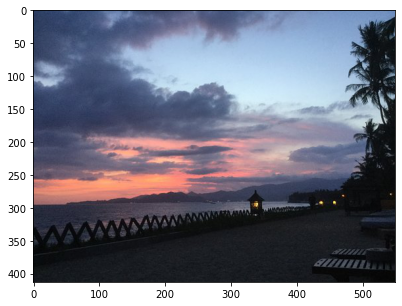

In [2]:
img = cv2.imread('data/evening.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1aee2515280>)

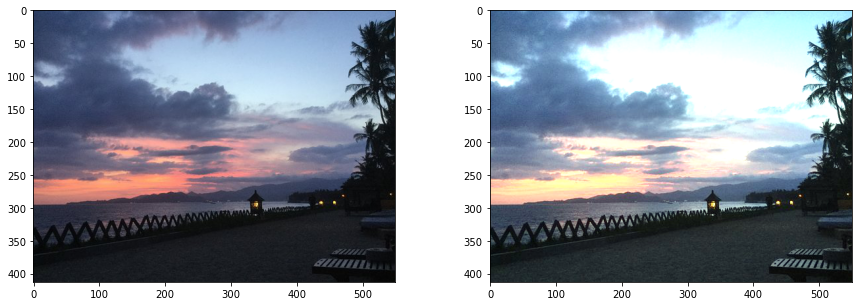

In [3]:
# Define white patch and the coefficients
row, col = 200, 400
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1aedf40a670>)

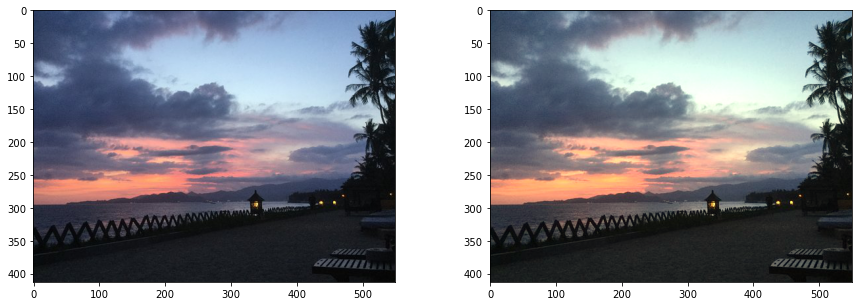

In [4]:
# # Load your image
img = cv2.imread('data/evening.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

 # Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[:, :, 0])
mean_g = np.mean(img[:, :, 1])
mean_b = np.mean(img[:, :, 2])
brightest = max([mean_r, mean_g, mean_b])

# # Compute the coefficients kr, kg, kb
# # Note: there are 3 coefficients to compute but we only have 2 equations.
# # Therefore, you have to make an assumption, fix the value of one of the
# # coefficients and compute the remining two
# # Hint: You can fix the coefficient of the brightest colour channel to 1.
kr = 1 if mean_r == brightest else mean_r / brightest
kg = 1 if mean_g == brightest else mean_g / brightest
kb = 1 if mean_b == brightest else mean_b / brightest

# # Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)

balanced[..., 0] = img[..., 0] / kr
balanced[..., 1] = img[..., 1] / kg
balanced[..., 2] = img[..., 2] / kb
    
balanced = balanced/255
balanced[balanced > 1] = 1
# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

[93.99927360774818, 96.26865507373982, 113.75871010345587]
1.2102083956325271 1.1816796444940363 1


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1aee247e130>)

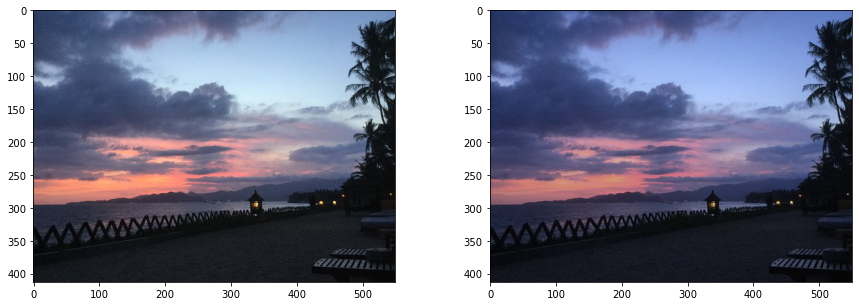

In [5]:
# Load your image
img = cv2.imread('data/evening.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.mean(img[:, :, 0])
max_g = np.mean(img[:, :, 1])
max_b = np.mean(img[:, :, 2])

brightest = max([max_r, max_g, max_b])
print([max_r, max_g, max_b])
kr = 1 if max_r == brightest else brightest/max_r
kg = 1 if max_g == brightest else brightest/max_g
kb = 1 if max_b == brightest else brightest/max_b
print(kr, kg, kb)
# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)

balanced[..., 0] = img[..., 0] / kr
balanced[..., 1] = img[..., 1] / kg
balanced[..., 2] = img[..., 2] / kb
    
balanced = balanced/255
balanced[balanced > 1] = 1


plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)